# Tutorial home sales

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
# Grid Search

## 1. 데이터 살펴보기
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 각 변수들이 나타내는 의미를 살펴보겠습니다.
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 화장실의 수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : Has been viewed
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

In [2]:
addr = "./data/"
df_train = pd.read_csv(os.path.join(addr,'train.csv'))
df_test = pd.read_csv(os.path.join(addr,'test.csv'))

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [4]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [6]:
df_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
def numberOfKinds(df):
    print("Number of group in data frame")
    for column in df.columns:
        num_col=len(pd.unique(df[column]))
        print(f"{column:20}: {num_col}")

In [8]:
numberOfKinds(df_train)
print()
numberOfKinds(df_test)

Number of group in data frame
id                  : 15035
date                : 365
price               : 3263
bedrooms            : 11
bathrooms           : 29
sqft_living         : 863
sqft_lot            : 7678
floors              : 6
waterfront          : 2
view                : 5
condition           : 5
grade               : 12
sqft_above          : 789
sqft_basement       : 271
yr_built            : 116
yr_renovated        : 65
zipcode             : 70
lat                 : 4692
long                : 716
sqft_living15       : 682
sqft_lot15          : 6958

Number of group in data frame
id                  : 6468
date                : 348
bedrooms            : 13
bathrooms           : 27
sqft_living         : 636
sqft_lot            : 4081
floors              : 6
waterfront          : 2
view                : 5
condition           : 5
grade               : 11
sqft_above          : 586
sqft_basement       : 225
yr_built            : 116
yr_renovated        : 61
zipcode             

In [9]:
##### i. continuous attributes
ra = ["grade", "sqft_living","sqft_lot","sqft_above",
      "sqft_basement", "lat", "long","sqft_living15","sqft_lot15"]

##### ii. discrete attributes
da = ["bedrooms", "bathrooms","floors","view",
      "condition", ]

##### iii. categorical attributes
ca = ["waterfront", "zipcode"]
##### iv. traget
target = ["price"]

##### v. date
chorono = ["yr_built", "yr_renovated"]

# EDA

#### 1. Check missing data

In [10]:
def check_missing(df):
    print("Number of Missing data at each column")
    for column in df.columns:
        a = df[column].isnull().sum()
        print(f"{column:20} :{a}")

In [11]:
check_missing(df_train)
print()
check_missing(df_test)

Number of Missing data at each column
id                   :0
date                 :0
price                :0
bedrooms             :0
bathrooms            :0
sqft_living          :0
sqft_lot             :0
floors               :0
waterfront           :0
view                 :0
condition            :0
grade                :0
sqft_above           :0
sqft_basement        :0
yr_built             :0
yr_renovated         :0
zipcode              :0
lat                  :0
long                 :0
sqft_living15        :0
sqft_lot15           :0

Number of Missing data at each column
id                   :0
date                 :0
bedrooms             :0
bathrooms            :0
sqft_living          :0
sqft_lot             :0
floors               :0
waterfront           :0
view                 :0
condition            :0
grade                :0
sqft_above           :0
sqft_basement        :0
yr_built             :0
yr_renovated         :0
zipcode              :0
lat                  :0
long       

df_train.drop(['sqft_living', 'sqft_lot'],axis=1, inplace=True)
df_test.drop(['sqft_living', 'sqft_lot'], axis=1, inplace=True)

In [12]:
df_train.shape, df_test.shape

((15035, 21), (6468, 20))

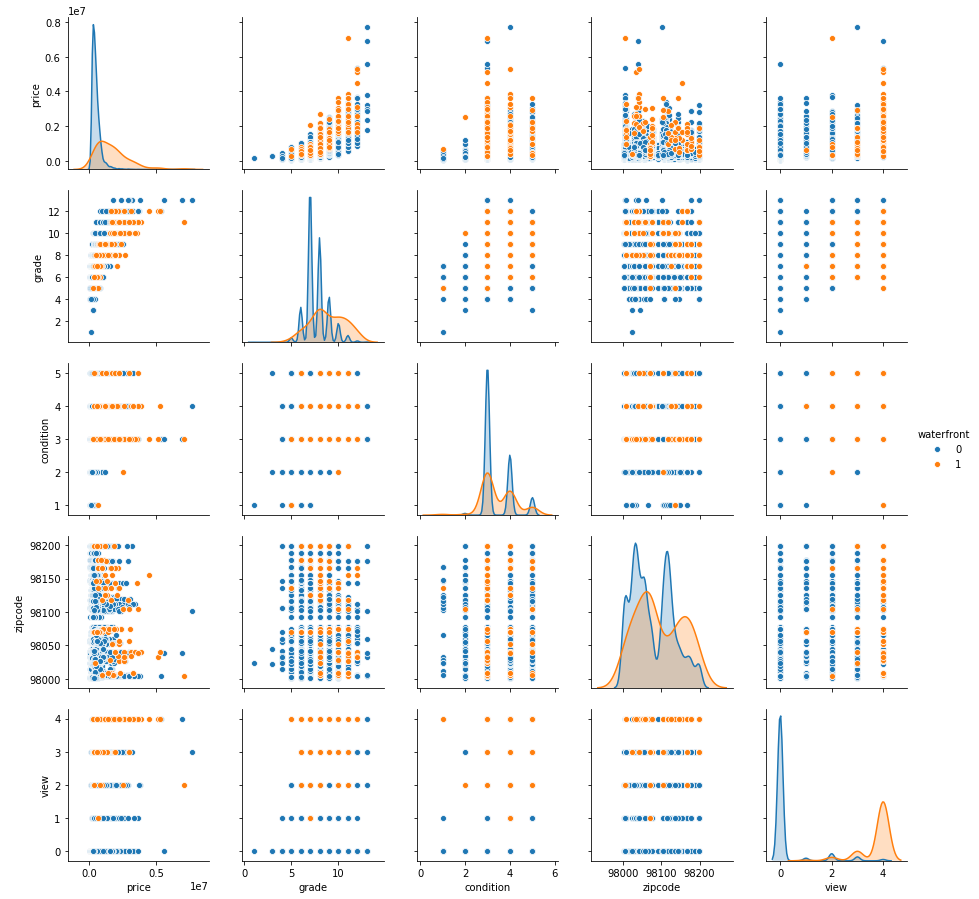

In [13]:
interested = ["price", "grade", "condition", "zipcode", "view"]
sns.pairplot(data = df_train, hue="waterfront", vars=interested)

* grade
* condition <= 2 => price mean value jump.
* zipcode => one-hot encoding
* 
* delete view

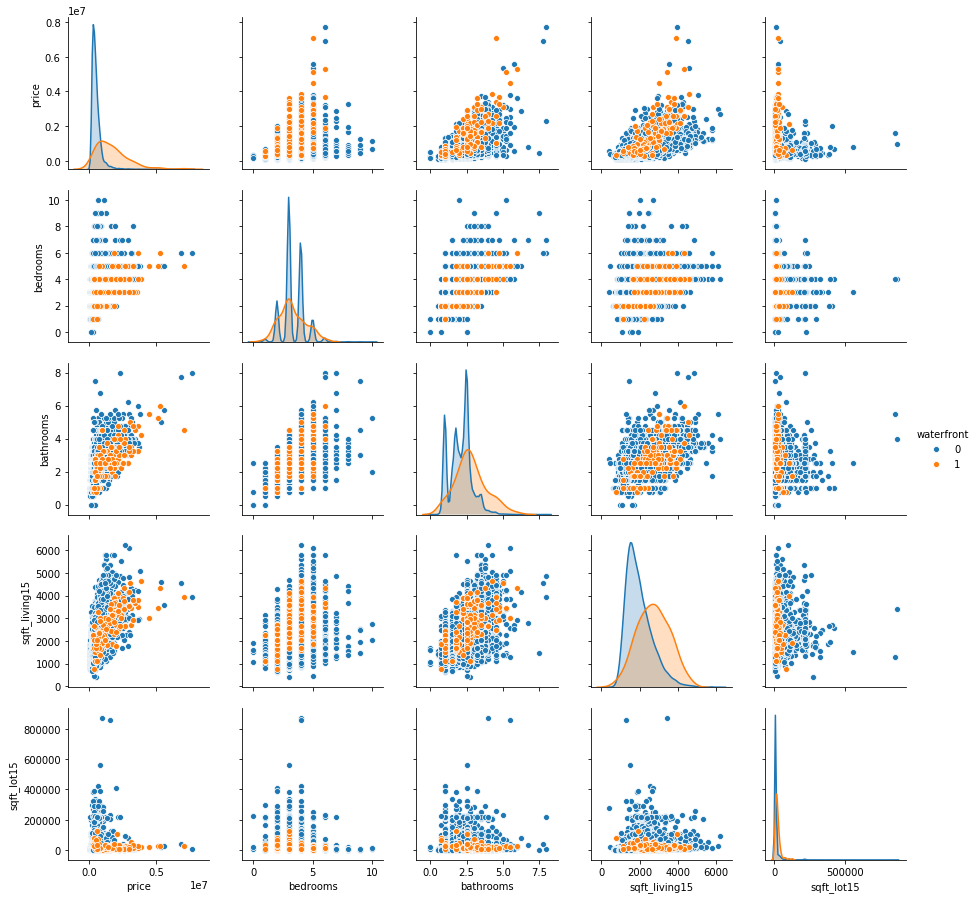

In [14]:
interested = ["price", "bedrooms", "bathrooms", "sqft_living15", "sqft_lot15"]
sns.pairplot(data=df_train, hue="waterfront", vars=interested)

In [ ]:
# interested = ["price", "month", "floors", "lat", "long","sqft_above","rooms"]
# sns.pairplot(data=df_train, hue="waterfront", vars=interested)

#### feature preprocessing

#### 1. date feature

In [15]:
df_train.date.head()

0    20141013T000000
1    20150225T000000
2    20150218T000000
3    20140627T000000
4    20150115T000000
Name: date, dtype: object

#### 1) year & month

In [16]:
df_train["year"] = df_train.date.apply(lambda x: int(x[:4]))
df_train["month"] = df_train.date.apply(lambda x: int(x[4:6]))
df_test["year"] = df_test.date.apply(lambda x: int(x[:4]))
df_test["month"] = df_test.date.apply(lambda x: int(x[4:6]))

In [17]:
df_train.drop(["date"],axis=1, inplace=True)
df_test.drop(["date"],axis=1, inplace=True)

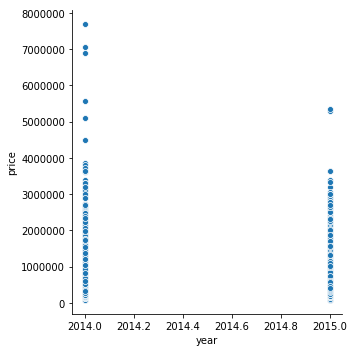

In [18]:
sns.relplot(x = "year", y="price",kind="scatter",data= df_train)

#### 2) House date - year when houses were built

In [19]:
df_train.yr_renovated.head()

0    0
1    0
2    0
3    0
4    0
Name: yr_renovated, dtype: int64

In [20]:
lambda_fn = lambda row : row['year'] - row['yr_renovated'] if row['yr_renovated'] else row['year'] - row['yr_built']
df_train["age"] = df_train.apply(lambda_fn, axis=1)

In [21]:
df_train["age"] = df_train.apply(lambda_fn, axis=1)

In [22]:
df_train.drop(["year","yr_renovated"], axis=1, inplace=True)

In [23]:
df_test["age"] = df_test.apply(lambda_fn, axis=1)
df_test.drop(["year","yr_renovated"], axis=1, inplace=True)

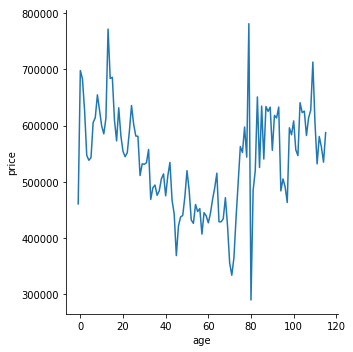

In [24]:
sns.relplot(x = "age", y="price", data=df_train, kind= "line", ci=None)

#### 2. bedrooms

c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


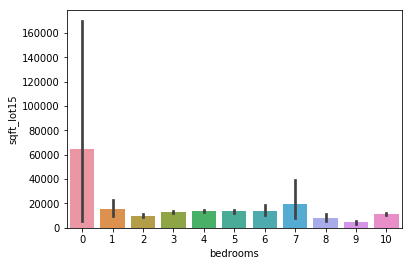

In [25]:
sns.barplot(x="bedrooms",y="sqft_lot15", data=df_train)

In [26]:
df_train['bedroom_mask'] = df_train["bedrooms"].apply(lambda x:0 if x else 1)
df_test["bedroom_mask"] = df_test["bedrooms"].apply(lambda x: 0 if x else 1)

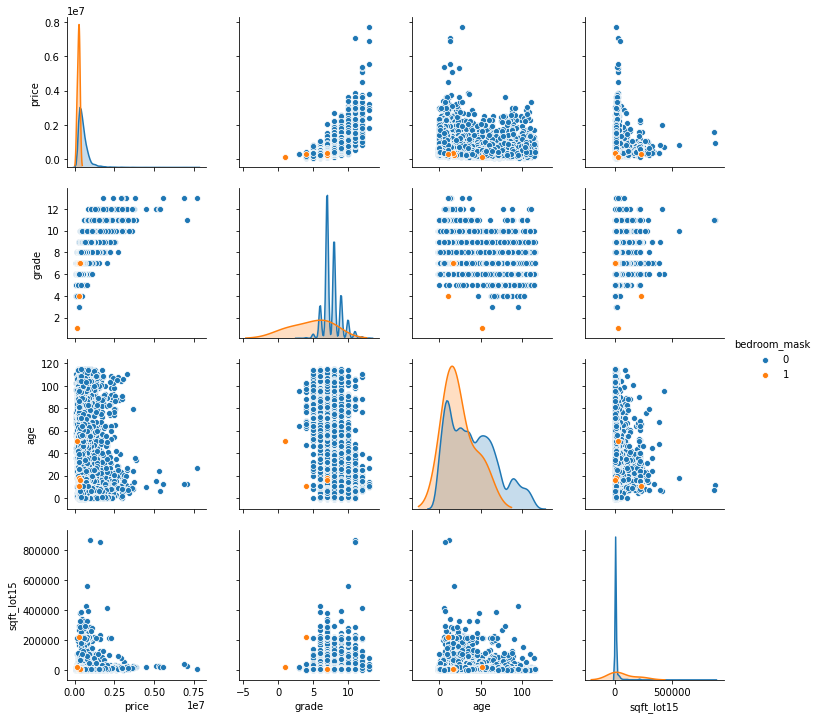

In [27]:
sns.pairplot(data=df_train, hue="bedroom_mask", vars=["price","grade","age","sqft_lot15"])

* bedroom == 0 : low price

In [28]:
df_train.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month', 'age', 'bedroom_mask'],
      dtype='object')

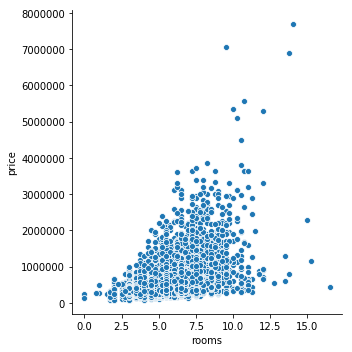

In [29]:
df_train["rooms"] = df_train.bedrooms + df_train.bathrooms
sns.relplot(x="rooms" ,y="price", data=df_train)

In [30]:
df_train.loc[df_train.rooms >= 30]


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,bedroom_mask,rooms


In [31]:
df_train.drop([11152],inplace=True)

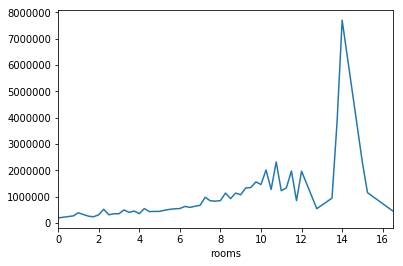

In [32]:
df_train.groupby("rooms").mean()['price'].plot()

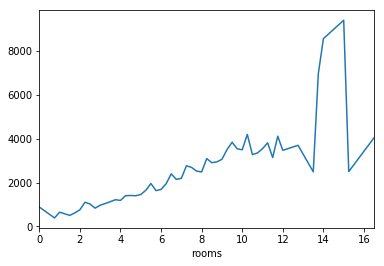

In [33]:
df_train.groupby("rooms").mean()["sqft_above"].plot()

In [34]:
df_train['rooms']=df_train.bedrooms + df_train.bathrooms
df_test['rooms']=df_test.bedrooms + df_test.bathrooms

In [35]:
df_train.drop(['sqft_basement'],axis=1, inplace=True)
df_test.drop(['sqft_basement'],axis=1, inplace=True)

In [36]:
df_train.drop(['bedrooms',"bathrooms"],axis=1, inplace=True)
df_test.drop(['bedrooms',"bathrooms"],axis=1, inplace=True)

In [37]:
df_train.columns, df_test.columns

(Index(['id', 'price', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
        'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
        'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'age',
        'bedroom_mask', 'rooms'],
       dtype='object'),
 Index(['id', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
        'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat',
        'long', 'sqft_living15', 'sqft_lot15', 'month', 'age', 'bedroom_mask',
        'rooms'],
       dtype='object'))

* zip code, lat, long, floors

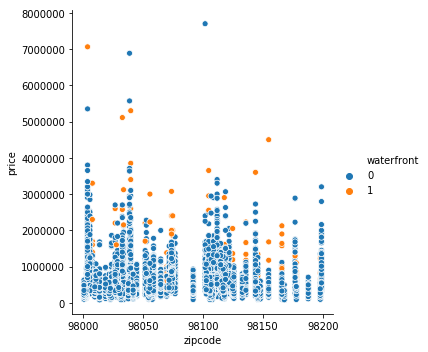

In [38]:
sns.relplot(x="zipcode", y="price", hue="waterfront",data=df_train)

* zip code => ont-hot encoding

In [39]:
df_train.loc[df_train.price >= 5000000]

,id,price,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,bedroom_mask,rooms
842,842,5110800.0,8010,45517,2.0,1,4,3,12,5990,1999,98033,47.6767,-122.211,3430,26788,10,15.0,0,10.25
947,947,5300000.0,7390,24829,2.0,1,4,4,12,5000,1991,98040,47.5631,-122.210,4320,24619,4,24.0,0,12.00
1045,1045,5350000.0,8000,23985,2.0,0,4,3,12,6720,2009,98004,47.6232,-122.220,4600,21750,4,6.0,0,10.00
2775,2775,7062500.0,10040,37325,2.0,1,2,3,11,7680,1940,98004,47.6500,-122.214,3930,25449,6,13.0,0,9.50
3134,3134,5570000.0,9200,35069,2.0,0,0,3,13,6200,2001,98039,47.6289,-122.233,3560,24345,8,13.0,0,10.75
5108,5108,7700000.0,12050,27600,2.5,0,3,4,13,8570,1910,98102,47.6298,-122.323,3940,8800,10,27.0,0,14.00
6469,6469,6885000.0,9890,31374,2.0,0,4,3,13,8860,2001,98039,47.6305,-122.240,4540,42730,9,13.0,0,13.75


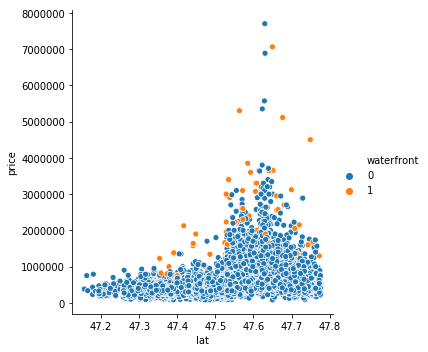

In [40]:
sns.relplot(x="lat",y="price", hue="waterfront",data=df_train)

* lat < 41.52 

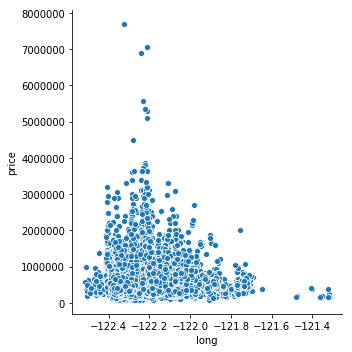

In [41]:
sns.relplot(x="long",y="price", data=df_train)

* long  < 121.9

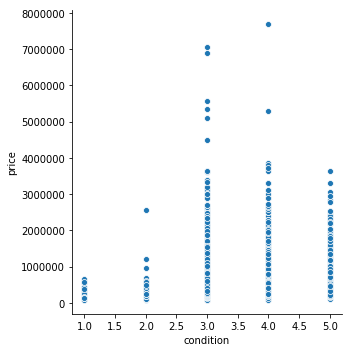

In [42]:
sns.relplot(x="condition",y="price", data=df_train)

In [43]:
df_train['lat2'] = df_train['lat'].apply(lambda x:1  if x > 41.5 else 0)
df_train['long2'] = df_train['long'].apply(lambda x:1  if x > 121.9 else 0)

df_test['lat2'] = df_test['lat'].apply(lambda x:1  if x > 41.5 else 0)
df_test['long2'] = df_test['long'].apply(lambda x:1  if x > 121.9 else 0)


In [44]:
df_train.drop(['lat','long'],axis=1, inplace=True)
df_test.drop(['lat','long'],axis=1, inplace=True)

In [45]:
df_train.drop(['view'],axis=1, inplace=True)
df_test.drop(['view'],axis=1, inplace=True)

In [46]:
df_train.shape, df_test.shape

((15034, 19), (6468, 18))

In [ ]:
# grid=sns.FacetGrid(df_train,col="Embarked",row="Pclass",hue="Survived",height=5,aspect=1)
# g=(grid.map(plt.scatter,"Age","Fare").add_legend())

#### Scaling

In [47]:
from sklearn.preprocessing import scale, minmax_scale

In [48]:
df_train.head(10)

,id,price,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,month,age,bedroom_mask,rooms,lat2,long2
0,0,221900.0,1180,5650,1.0,0,3,7,1180,1955,98178,1340,5650,10,59.0,0,4.00,1,0
1,1,180000.0,770,10000,1.0,0,3,6,770,1933,98028,2720,8062,2,82.0,0,3.00,1,0
2,2,510000.0,1680,8080,1.0,0,3,8,1680,1987,98074,1800,7503,2,28.0,0,5.00,1,0
3,3,257500.0,1715,6819,2.0,0,3,7,1715,1995,98003,2238,6819,6,19.0,0,5.25,1,0
4,4,291850.0,1060,9711,1.0,0,3,7,1060,1963,98198,1650,9711,1,52.0,0,4.50,1,0
5,5,662500.0,3560,9796,1.0,0,3,8,1860,1965,98007,2210,8925,4,50.0,0,5.50,1,0
6,6,468000.0,1160,6000,1.0,0,4,7,860,1942,98115,1330,6000,5,72.0,0,3.00,1,0
7,7,310000.0,1430,19901,1.5,0,4,7,1430,1927,98028,1780,12697,5,87.0,0,4.00,1,0
8,8,400000.0,1370,9680,1.0,0,4,7,1370,1977,98074,1370,10208,10,37.0,0,4.75,1,0
9,9,530000.0,1810,4850,1.5,0,3,7,1810,1900,98107,1360,4850,3,115.0,0,7.00,1,0


In [49]:
df_train.shape, df_test.shape

((15034, 19), (6468, 18))

age, month: minmaxscale

sqft_living15, sqft_lot15, sqft_above : normalization

In [50]:
def apply_func(func, df, *args):
    for col in args:
        df[col]=func(df[col])

In [51]:
apply_func(minmax_scale, df_train, *["age", "month"])
apply_func(minmax_scale, df_test, *["age", "month"])

c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [52]:
target_attributes = ["sqft_living15","sqft_lot15", "sqft_above"]
apply_func(np.log, df_train, *target_attributes)
apply_func(np.log, df_test, *target_attributes)

#### one-hot encoding

In [53]:
df_train = pd.get_dummies(df_train, columns=["zipcode"], prefix="zip")
df_test = pd.get_dummies(df_test, columns=["zipcode"], prefix="zip")

In [ ]:
# df_train_1 = df_train.loc[df_train['condition']<=2]
# df_train_2 = df_train[df_train['condition']>2]
# df_test_1 = df_train.loc[df_train['condition']<=2]
# df_test_2 = df_train[df_train['condition']>2]

In [54]:
y_tr = df_train["price"]
df_train.drop(['price'],axis=1, inplace=True)

In [55]:
y = y_tr.values// 1000

In [56]:
y = np.log(y)

# Model

In [57]:
df_train.shape, df_test.shape

((15034, 87), (6468, 87))

In [58]:
from sklearn import linear_model

# Cross-validation
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
# GridSearch
from sklearn.metrics import mean_squared_error

In [59]:
kfold = KFold(n_splits=5, shuffle = True, random_state = 0)
params = {'alpha_1':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2],'lambda_1':[1e-6, 1e-5, 1e-4, 1e-3, 1e-2]}
grid = GridSearchCV(linear_model.BayesianRidge(),params, cv=kfold)

In [60]:
grid.fit(df_train.values, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
pred = grid.predict(df_train.values)

In [62]:
a = mean_squared_error(np.exp(pred)*1000, np.exp(y)*1000)

In [63]:
a

19284019599.840504

In [64]:
pow(a,0.5)

138866.91326532935

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear',linear_model.Ridge())])

In [ ]:
model.fit(df_train.values, y)

c:\users\jmson\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [ ]:
pred = model.predict(df_train.values)

In [ ]:
a = pd.DataFrame({"pred":np.exp(pred).astype(np.int32)*1000, "target":np.exp(y)*1000})
sns.relplot(x='pred',y='target',data=a)

In [ ]:
target = grid.predict(df_test.values)
sub = pd.DataFrame(data={'id':df_test.id,'price':np.exp(target)*1000})
sub.to_csv("submission1.csv", index=False)

In [ ]:
score = cross_val_score(reg,df_train.values, y, cv=kfold)

In [ ]:
score

In [ ]:
reg = linear_model.Lasso(alpha=0.5)

In [ ]:
yrr= reg.predict(df_train.values)

In [ ]:
np.sum((yrr-y)**2)

# Training

In [ ]:
yt = np.log(y_tr.values // 1000)

In [ ]:
y_pred.max()

# Prediction on test data & Making Submission file

In [ ]:
sub = pd.DataFrame(data={'id':df_test.id,'price':np.exp(y_pred)*1000})

In [ ]:
sub.to_csv('submission.csv', index=False)

In [ ]:
sub.shape